# This notebook will attempt to understand how much jamming a bat may be experiencing as it echolocates in groups using an analytical modelling approach. 


### We begin by assuming a single bat flying a group of conspecific echolocators. Our focal bat is trying to keep track of 3 echoes (for starters) in a group of Nbats, which are independently emitting 1 call/ 100milliseconds. 
#### *(we will vary these parameters later and see what effect it has !)

### Our focal bat also emits calls at 1call/100ms, with a duration of 3ms. It also suffers from forward and backward masking as it tries to listen to the three target echoes. We assume that if a conspecific call arrives within the timeperiods before (forward masking window) or after (backward masking window) - an echo is considered not to be heard

### We also assume, for simplicity, that the focal bat does not hear anything as it emits its FM sweep - and thereby only focus our analysis of echo perception duing the pulse interval, of 100 milliseconds. 

In [221]:
%%html
<img src="img/focal_bat_in_group.png",width=15,height=15>


### We justify the bat keeping track of only three echoes for now, based on studies of collective behaviour - which show that individuals need to respond to only a few conspecifics in their close proximity to avoid collisions and maintain group flight [refs].

### We try to quantify in this modelling exercise, how often:

###   > the bat can hear all 3 echoes clearly
###   > .... can hear at least 2 echoes clearly
###   > .... can hear at least 1 echo clearly
###   > .... cannot hear any of the echoes 



### We now discretise the 100ms pulse interval within which our focal bat is listening into 3ms bins. This gives us 33 bins within each pulse interval. We choose 3ms as it is the duration of the call and echo. 


### The discretisation of the pulse interval into 33 bins allows us to calculate how often echoes will be heard. 
### The probability of any one echo being heard is calculated by how often calls will arrive in the forward and backward masking windows around the echo. This can be calculated by counting at how many configurations of Ncalls are possible without masking an echo, and dividing it by total number of (unconstrained) combinations.

### The same logic can be applied for two and three echoes. The probability of no echo being heard is given by :
###  * P(no echo heard) = 1 -  { P(1 echo heard) + P(2 echoes heard) + P(3 echoes heard) }*



In [222]:
%%html
<img src="img/echo_in_pulsE_interval.png",width=15,height=15>

# Single echo with $N$ calls :

### Let's do the calculation for the simple case of one echo, with $Ncalls$ per pulse interval. For the echo to be heard we must calculate the proportion of configurations where the calls can be placed out of the masking window. 

#### $P(\ echo\ being\ heard\ ) = \frac{ Num\ Configurations\  ( Ncalls\ outside\ of\ masking\ window)}{Total\ Number\ of\ Configurations} $






### The total number of configurations is basically the equivalent of placing $N$ indistinguishable calls into $B$ distinguishable timebins *without exclusion*

### This is calculated by $${Ncalls + Bbins -1  \choose Bbins}$$

ref :  http://cns-web.bu.edu/~eric/EC500/attachments/ON(2d)LINE(20)READINGS/ballsinboxe.pdf




### The number of configurations where the echo is heard is , using similar logic , the equivalent of placing $N$ calls in $B-maskingwindow$ bins , also calculate by :

### $${Ncalls + (Bbins - maskingwindow) -1  \choose (Bbins-maskingwindow )}$$




### We can then calculate the P(echo being heard) as :

\begin{equation*}
\frac{{Ncalls + (Bbins - maskingwindow) -1  \choose (Bbins-maskingwindow )} }{{Ncalls + Bbins -1  \choose Bbins}}
\end{equation*}

### Let's now begin to substitute our numbers into the above equations and get a sense of the frequency at which echo-masking occurs. In the one echo situation, the bat either hears the echo or doesn't. We calculate the probability of the bat hearing this single echo in the presence of  Ncalls. 

### We assume, with reference to literature the following forward and backward masking windows :

### Forward masking window of 6 ms (Ruihong et al. 2003) == 2 bins
### Backward masking window of 2 ms ( Mohl & Surlykke 1989) == 1 bin
### These two imply a masking window of 2 + 1 + 1   = 4 bins , where the last 1 bin includes the echo itself

### With the above numbers, let's calculate the probability of one echo being heard in the presence of $N = 1....10$ calls during the pulse interval . 


In [1]:
from __future__ import division
import numpy as np
import scipy
from scipy import misc 
import matplotlib.pyplot as plt

def prob_1echo_heard(Ncalls=3,Bbins=33,maskingwindow=4):
    '''
    '''
    if Ncalls==1:
        
        total_num_ways = Bbins
        num_ways_echo_heard = Bbins - maskingwindow
        
    
    elif Ncalls >1 :
        total_num_ways  = misc.comb( Ncalls+Bbins-1, Ncalls )
        num_ways_echo_heard = misc.comb( Ncalls+Bbins-maskingwindow-1, Ncalls   )

    p_echo_heard = num_ways_echo_heard / np.float64(total_num_ways)
     
    #print(num_ways_echo_heard,total_num_ways)
    return(p_echo_heard)

In [201]:
ncalls_values = range(1,20)
p_across_ncalls = np.array( [prob_1echo_heard(each_ncallvalue) for each_ncallvalue in ncalls_values])

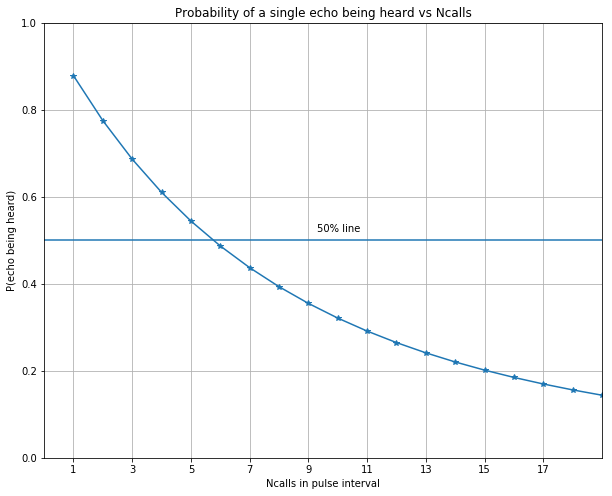

In [202]:
%matplotlib inline
plt.figure(1,figsize=(10,8))
plt.plot(ncalls_values,p_across_ncalls,'*-');plt.grid();
plt.xlabel('Ncalls in pulse interval');plt.ylabel('P(echo being heard)')
plt.xlim(0,np.max(ncalls_values));plt.ylim(0,1);plt.xticks(np.arange(1,np.max(ncalls_values),2));
plt.axhline(0.5);plt.text(9.3,0.52,'50% line')
np.argmin((abs(0.5-p_across_ncalls)));plt.title('Probability of a single echo being heard vs Ncalls')

# Two echoes with $N$ calls :

### Having looked at the simplest case possible, let's look at the case where we have *two* echoes being tracked, and N calls in the pulse interval. 

### The two echoes are assumed to be non-overlapping, and well-spaced, so that their maskingwindows are also non-overlapping. This allows us to calculate the number of configurations with:

\begin{equation*}
P(both\ echoes\ heard) = \frac{ NumConfigurations \ ( Ncalls\ outside\ of\ maskingwindows)}{ Total \ Number \ of \ Configurations }
\end{equation*}

### The total number of ways one can place $N$ calls in $B$ - $ (2 \times maskingwindows)$ bins is :


\begin{equation*}
Num \ ways\ 2\ echoes\ heard = {Ncalls + Bbins - (2 \times maskingwindow) -1  \choose Ncalls}
\end{equation*}

### And so $P\ (both \ echoes \ heard) = \frac{{Ncalls + Bbins - (2 \times maskingwindow) - 1  \choose Ncalls}}{{Ncalls + Bbins -1  \choose Ncalls}} $

In [205]:
def prob_n_echoes_heard(Ncalls=3,Bbins=33,maskingwindow=4,n=2):
    if Ncalls==1:

        total_num_ways = Bbins
        num_ways_echo_heard = Bbins - maskingwindow*n


    elif Ncalls >1 :
        total_num_ways  = misc.comb( Ncalls+Bbins-1, Ncalls )
        num_ways_echo_heard = misc.comb( Ncalls+Bbins- n*maskingwindow-1, Ncalls   )

    p_echo_heard = num_ways_echo_heard / float(total_num_ways)
    #print(num_ways_echo_heard,total_num_ways)

    return(p_echo_heard)


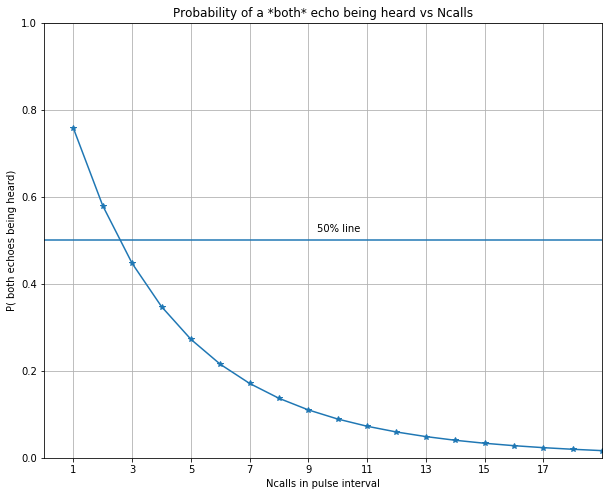

In [206]:
p_both_echoesheard = [ prob_n_echoes_heard(each_ncalls) for each_ncalls in ncalls_values]
plt.figure(2,figsize=(10,8))
plt.plot(ncalls_values,p_both_echoesheard,'*-');plt.grid();
plt.xlabel('Ncalls in pulse interval');plt.ylabel('P( both echoes being heard)')
plt.xlim(0,np.max(ncalls_values));plt.ylim(0,1);plt.xticks(np.arange(1,np.max(ncalls_values),2));
plt.axhline(0.5);plt.text(9.3,0.52,'50% line')
np.argmin((abs(0.5-p_across_ncalls)));plt.title('Probability of a *both* echo being heard vs Ncalls')

###  What when there are three echoes - what is the situation then ? (without deriving the probability):


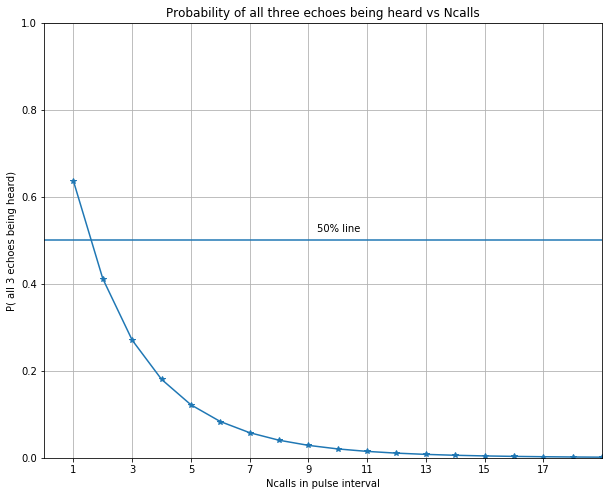

In [207]:
p_3_echoes_heard = np.array( [   prob_n_echoes_heard(Ncalls=each_ncall,n=3)   for each_ncall in ncalls_values] )
plt.figure(3,figsize=(10,8))
plt.plot(ncalls_values,p_3_echoes_heard,'*-');plt.grid();
plt.xlabel('Ncalls in pulse interval');plt.ylabel('P( all 3 echoes being heard)')
plt.xlim(0,np.max(ncalls_values));plt.ylim(0,1);plt.xticks(np.arange(1,np.max(ncalls_values),2));
plt.axhline(0.5);plt.text(9.3,0.52,'50% line')
np.argmin((abs(0.5-p_across_ncalls)));plt.title('Probability of all three echoes being heard vs Ncalls')

# 3 echoes, Ncalls, with 'echo glimpsing'

### It seems evident above , that the bat can only hear all three echoes < 50% of the time ! However, perhaps our focal bat does not always need to hear all echoes at the same time. 

### Given that it is keeping track of 3 echoes, let us see how often it can actually detect 1 echo, 2 echoes, all three echoes, and NO echoes. 

### We take on a computational approach here instead because I tried it analytically, and it gets a bit tricky when one wants to look at the number of unique configurations possible which result in P(1 echo heard) !! 

### We will now simulate $N$ calls, where $N = 1...7$ calls per pulse interval, with three target echoes. Having calculated all possible ways to spread the calls in the pulse interval, we will then calculate the probability of the different number of echoes being heard.



In [11]:
# code credit: https://stackoverflow.com/questions/996004/enumeration-of-combinations-of-n-balls-in-a-boxes
def balls_in_baskets(balls=1, baskets=1):
    if baskets == 1:
        yield [balls]
    elif balls == 0:
        yield [0]*baskets
    else:
        for i in xrange(balls+1):
            for j in balls_in_baskets(balls-i, 1):
                for k in balls_in_baskets(i, baskets-1):
                    yield j+k

combins = [ i for i in balls_in_baskets(2,33)]
all_combs = np.array(combins)
num_combs = all_combs.shape[0]
print( '', num_combs )
#all_combs

('', 561L)


In [14]:
# code credit: https://stackoverflow.com/questions/37711817/generate-all-possible-outcomes-of-k-balls-in-n-bins-sum-of-multinomial-catego
import itertools, operator
def combinations_with_replacement_counts(n, r):
    size = n + r - 1
    for indices in itertools.combinations(range(size), n-1):
        starts = [0] + [index+1 for index in indices]
        stops = indices + (size,)
        yield tuple(map(operator.sub, stops, starts))

y = list(combinations_with_replacement_counts(33,6))
len(y)

2760681

(0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 3,
 0,
 0,
 0)

In [ ]:
def calculate_fraction_echoes(all_combinations,nechoes=3,maskingwindow=1):
    '''
    Given a set of combinations of indistinguishable balls in distinguishable boxes
    - counts the number of cases where the 'echoes' could be heard as decided by the maskingwindow 
    
    Input:
    all_combinations: list with sublists. each entry in the sublist has the number of balls in that box
    nechoes : number of target echoes
    maskingwindow: the number of boxes (including one box for the echo) which are to be considered 
    
    Output:
    P_echoes : list with fractions of cases where 0 ,1,2...nechoes are audible.
    
    The masking window is a composite window treated as a block of time within which a call is not supposed to be registered 
    for an echo to be heard    
    '''
    
    # designate the echos with their maskingwindows as being laid out one after the other
    # we are not including any temporal aspects in the hearing/masking in this model - and so it doesn't really matter which
    # set of boxes we assign to the masking windows. This is a choice to make the coding easier. 
    
    
    
    

In [19]:
y[0]

(0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6)